# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_less = pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')
df = pd.read_csv('Melbourne_housing_FULL.csv')
df_copy = df.copy()
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Summary

In [3]:
df.shape

(34857, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
# Total Summary

def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Blue'),
        ('font-size', '18px'),
        ('font-weight','bold')
    ]}])

def check_data(data, title):
    cols = data.columns.to_list()
    display(set_frame_style(data[cols].head(),f'{title}: First 5 Rows Of Data'))
    display(set_frame_style(data[cols].describe(),f'{title}: Summary Statistics'))
    display(set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1).transpose(), f'{title}: Unique Value Counts In Each Column'))
    display(set_frame_style(data[cols].isna().sum().to_frame().transpose(), f'{title}:Columns With Nan'))
    
check_data(df, 'Train data')
print('-'*100)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,nan,SS,Jellis,3/09/2016,2.500000,3067.000000,2.000000,1.000000,1.000000,126.000000,nan,nan,Yarra City Council,-37.801400,144.995800,Northern Metropolitan,4019.000000
1,Abbotsford,85 Turner St,2,h,1480000.000000,S,Biggin,3/12/2016,2.500000,3067.000000,2.000000,1.000000,1.000000,202.000000,nan,nan,Yarra City Council,-37.799600,144.998400,Northern Metropolitan,4019.000000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000000,S,Biggin,4/02/2016,2.500000,3067.000000,2.000000,1.000000,0.000000,156.000000,79.000000,1900.000000,Yarra City Council,-37.807900,144.993400,Northern Metropolitan,4019.000000
3,Abbotsford,18/659 Victoria St,3,u,nan,VB,Rounds,4/02/2016,2.500000,3067.000000,3.000000,2.000000,1.000000,0.000000,nan,nan,Yarra City Council,-37.811400,145.011600,Northern Metropolitan,4019.000000
4,Abbotsford,5 Charles St,3,h,1465000.000000,SP,Biggin,4/03/2017,2.500000,3067.000000,3.000000,2.000000,0.000000,134.000000,150.000000,1900.000000,Yarra City Council,-37.809300,144.994400,Northern Metropolitan,4019.000000


,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,27247.000000,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.000000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1050173.344955,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.256400,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,641467.130105,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.267060,37.328178,0.090279,0.120169,4428.090313
min,1.000000,85000.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,635000.000000,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.000000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,870000.000000,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.000000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1295000.000000,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.000000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,11200000.000000,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.390200,145.526350,21650.000000


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Unique Value Count,351,34009,12,3,2871,9,388,78,215,211,15,11,15,1684,740,160,33,13402,14524,8,342


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,0,0,0,7610,0,0,0,1,1,8217,8226,8728,11810,21115,19306,3,7976,7976,3,3


----------------------------------------------------------------------------------------------------


In [6]:
print(f'Total duplicated: {sum(df.duplicated())}')
df.drop_duplicates(inplace= True) # 1 duplicated dropped.
df.shape

Total duplicated: 1


(34856, 21)

In [7]:
df.corr(numeric_only= True)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.465238,0.271513,0.085890,0.946755,0.611875,0.393880,0.037402,0.156231,-0.012743,0.004871,0.103244,-0.071678
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017
Distance,0.271513,-0.211384,1.000000,0.481567,0.269528,0.126168,0.241831,0.060864,0.076295,0.323035,-0.100414,0.200923,-0.018130
Postcode,0.085890,0.044950,0.481567,1.000000,0.089292,0.120079,0.067885,0.040665,0.042436,0.089800,-0.231026,0.362901,0.017111
Bedroom2,0.946755,0.430275,0.269528,0.089292,1.000000,0.614940,0.388492,0.037019,0.154159,-0.002017,0.003447,0.106172,-0.053453
Bathroom,0.611875,0.429878,0.126168,0.120079,0.614940,1.000000,0.307520,0.036341,0.147554,0.167869,-0.059174,0.106444,-0.032847
Car,0.393880,0.201803,0.241831,0.067885,0.388492,0.307520,1.000000,0.037830,0.104371,0.128688,-0.009018,0.047200,-0.009611
Landsize,0.037402,0.032748,0.060864,0.040665,0.037019,0.036341,0.037830,1.000000,0.354532,0.044484,0.025317,-0.002579,-0.018197
BuildingArea,0.156231,0.100754,0.076295,0.042436,0.154159,0.147554,0.104371,0.354532,1.000000,0.067758,0.017158,-0.002160,-0.024516
YearBuilt,-0.012743,-0.333306,0.323035,0.089800,-0.002017,0.167869,0.128688,0.044484,0.067758,1.000000,0.091606,-0.022261,0.022456


# Preprocessing

In [8]:
from sklearn.impute import KNNImputer

def impute_with_knn(df, target_column, feature_columns, n_neighbors=2):
    # Hedef sütun ve özellik sütunlarını seç
    subset_df = df[[target_column] + feature_columns]

    # KNN Imputer oluştur
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Imputation (doldurma) işlemi yap
    subset_df_imputed = imputer.fit_transform(subset_df)

    # İşlenmiş veriyi orijinal DataFrame'e geri koy
    df[target_column] = subset_df_imputed[:, 0]
    
    return df

In [9]:
df = impute_with_knn(df , target_column= 'Bedroom2' , feature_columns= ['Rooms'])
df = impute_with_knn(df , target_column= 'Bathroom' , feature_columns= ['Rooms' , 'Price' , 'Bedroom2'])
df = impute_with_knn(df , target_column= 'Car' , feature_columns= ['Rooms' , 'Price' , 'Bedroom2' , 'Bathroom' , 'Price' , 'Distance'])
df = impute_with_knn(df , target_column= 'BuildingArea' , feature_columns= ['Rooms' , 'Price' , 'Distance', 'Bedroom2' , 'Bathroom' , 'Car', 'Price' , 'Distance', 'Landsize'])
df = impute_with_knn(df , target_column= 'YearBuilt' , feature_columns= ['Price' , 'Distance' , 'Bathroom' , 'Car' ])

df.drop('Landsize' , axis=1 , inplace= True)

In [10]:
# Gruplayarak eksik verileri doldur
for name, group in df.groupby('Suburb'):
    mean_lattitude = group['Lattitude'].mean()
    mean_longtitude = group['Longtitude'].mean()
    
    mask = (df['Suburb'] == name) # We can use 'Suburb' or 'CouncilArea' too.
    
    df.loc[mask, 'Lattitude'] = df.loc[mask, 'Lattitude'].fillna(mean_lattitude)
    df.loc[mask, 'Longtitude'] = df.loc[mask, 'Longtitude'].fillna(mean_longtitude)
    

# Gruplayarak eksik verileri doldur
for name, group in df.groupby('CouncilArea'):
    mean_lattitude = group['Lattitude'].mean()
    mean_longtitude = group['Longtitude'].mean()
    
    mask = (df['CouncilArea'] == name) # We can use 'Suburb' or 'CouncilArea' too.
    
    df.loc[mask, 'Lattitude'] = df.loc[mask, 'Lattitude'].fillna(mean_lattitude)
    df.loc[mask, 'Longtitude'] = df.loc[mask, 'Longtitude'].fillna(mean_longtitude)


In [11]:
df.dropna(subset=['CouncilArea'] , inplace= True)

In [12]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            7609
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
BuildingArea        0
YearBuilt           0
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [13]:
# 'Date' sütununu pandas datetime objesine dönüştür
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Yeni 'Month' ve 'Year' sütunları oluştur
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.drop(['Date' , 'Address' , 'Postcode'] , axis = 1, inplace= True)

cat_features = ['Suburb' , 'Type' , 'Method' , 'SellerG' , 'Year' , 'Month' , 'CouncilArea' , 'Regionname']
num_features = df.select_dtypes(np.number).columns.tolist()
target_col = 'Price'

for column in cat_features:
    df[column] = df[column].astype('category')

In [14]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bedroom2,Bathroom,Car,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,2.0,1.0,1.0,129.5,1907.5,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,9,2016
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,2.0,1.0,1.0,114.5,1965.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,12,2016
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,2.0,1.0,0.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2,2016
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3.0,2.0,1.0,114.5,1954.5,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2,2016
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3.0,2.0,0.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,3,2017


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34853 entries, 0 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34853 non-null  category
 1   Rooms          34853 non-null  int64   
 2   Type           34853 non-null  category
 3   Price          27244 non-null  float64 
 4   Method         34853 non-null  category
 5   SellerG        34853 non-null  category
 6   Distance       34853 non-null  float64 
 7   Bedroom2       34853 non-null  float64 
 8   Bathroom       34853 non-null  float64 
 9   Car            34853 non-null  float64 
 10  BuildingArea   34853 non-null  float64 
 11  YearBuilt      34853 non-null  float64 
 12  CouncilArea    34853 non-null  category
 13  Lattitude      34853 non-null  float64 
 14  Longtitude     34853 non-null  float64 
 15  Regionname     34853 non-null  category
 16  Propertycount  34853 non-null  float64 
 17  Month          34853 non-null  categ

# Feature Engineering

In [16]:
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df, columns):
    encoders = {}
    
    for col in columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[f'le_{col}'] = le
    
    return df, encoders

df, encoders = encode_categorical_columns(df, cat_features)

In [17]:
# from scipy.stats import zscore

# def remove_outliers(df, numeric_cols, sigma=3):
#     df_copy = df.copy()
    
#     for col in numeric_cols:
#         z_scores = zscore(df_copy[col])
#         abs_z_scores = np.abs(z_scores)
#         filtered_entries = (abs_z_scores < sigma)
#         df_copy = df_copy[filtered_entries]
        
#     return df_copy

# df = remove_outliers(df, num_features, sigma= 3)

# Train | Test Split

In [18]:
df_train = df.dropna()
df_test = df[df['Price'].isna()]

In [19]:
from sklearn.model_selection import train_test_split

X = df_train.drop('Price' , axis = 1)
y = df_train['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visulizations

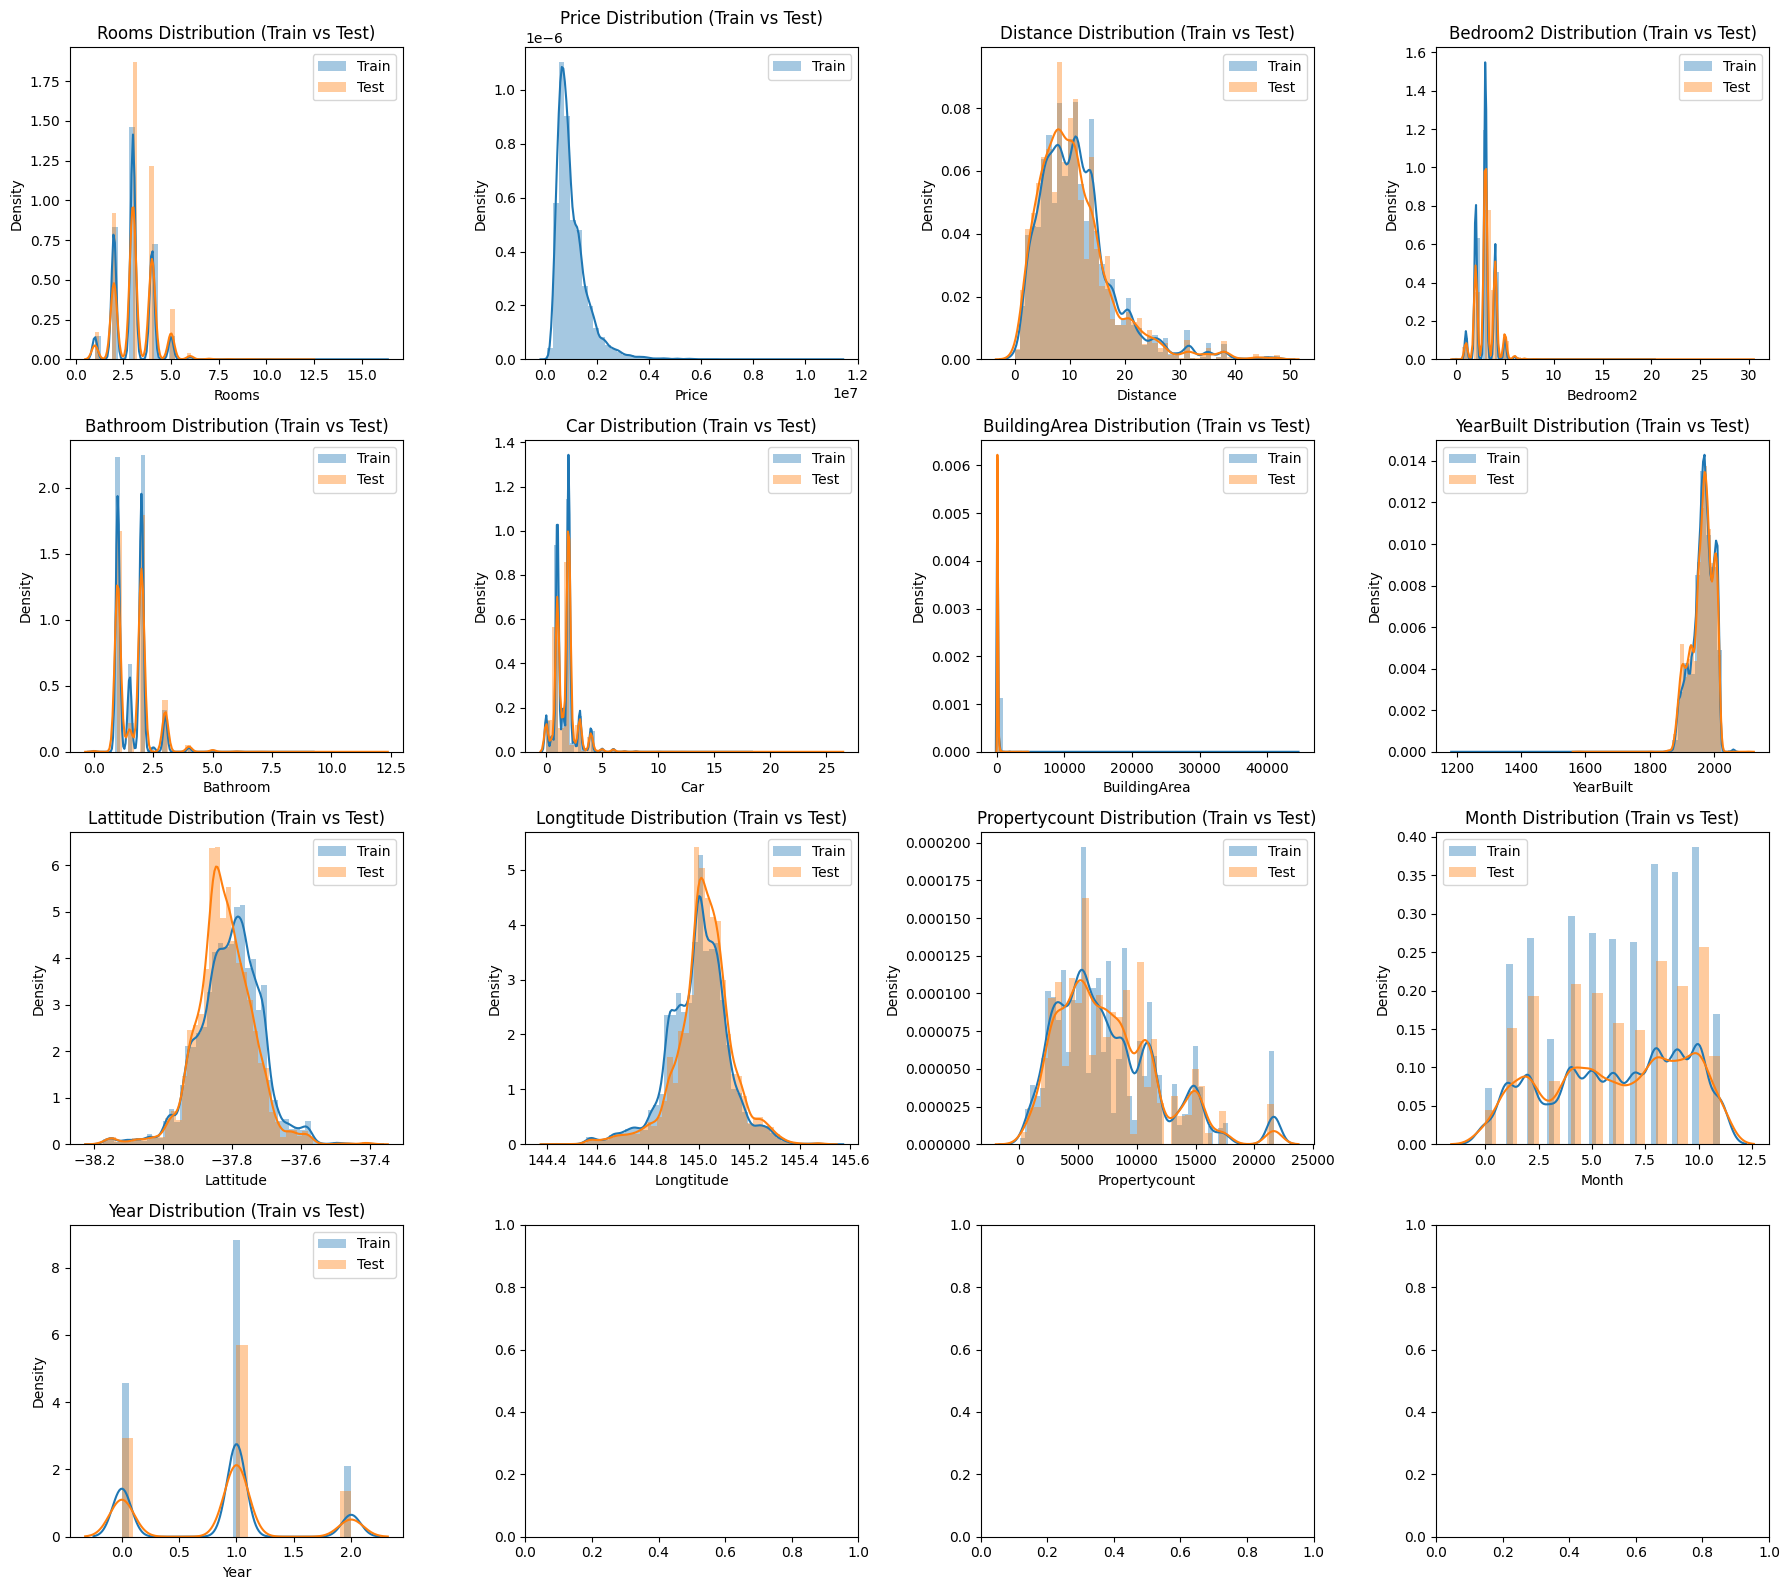

In [20]:
import warnings
warnings.filterwarnings("ignore")

def plot_histograms(df_train, df_test, target_col, n_cols=3):
    n_rows = (len(df_train.columns) - 1) // n_cols + 1

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 4*n_rows))
    axes = axes.flatten()

    for i, var_name in enumerate(df_train.columns.tolist()):
        if var_name != 'is_generated':
            ax = axes[i]
            sns.distplot(df_train[var_name], kde=True, ax=ax, label='Train')
            if var_name != target_col:
                sns.distplot(df_test[var_name], kde=True, ax=ax, label='Test')
            ax.set_title(f'{var_name} Distribution (Train vs Test)')
            ax.legend()

    plt.tight_layout()
    plt.show()

plot_histograms(df_train[num_features], df_test[num_features], target_col, n_cols=4)

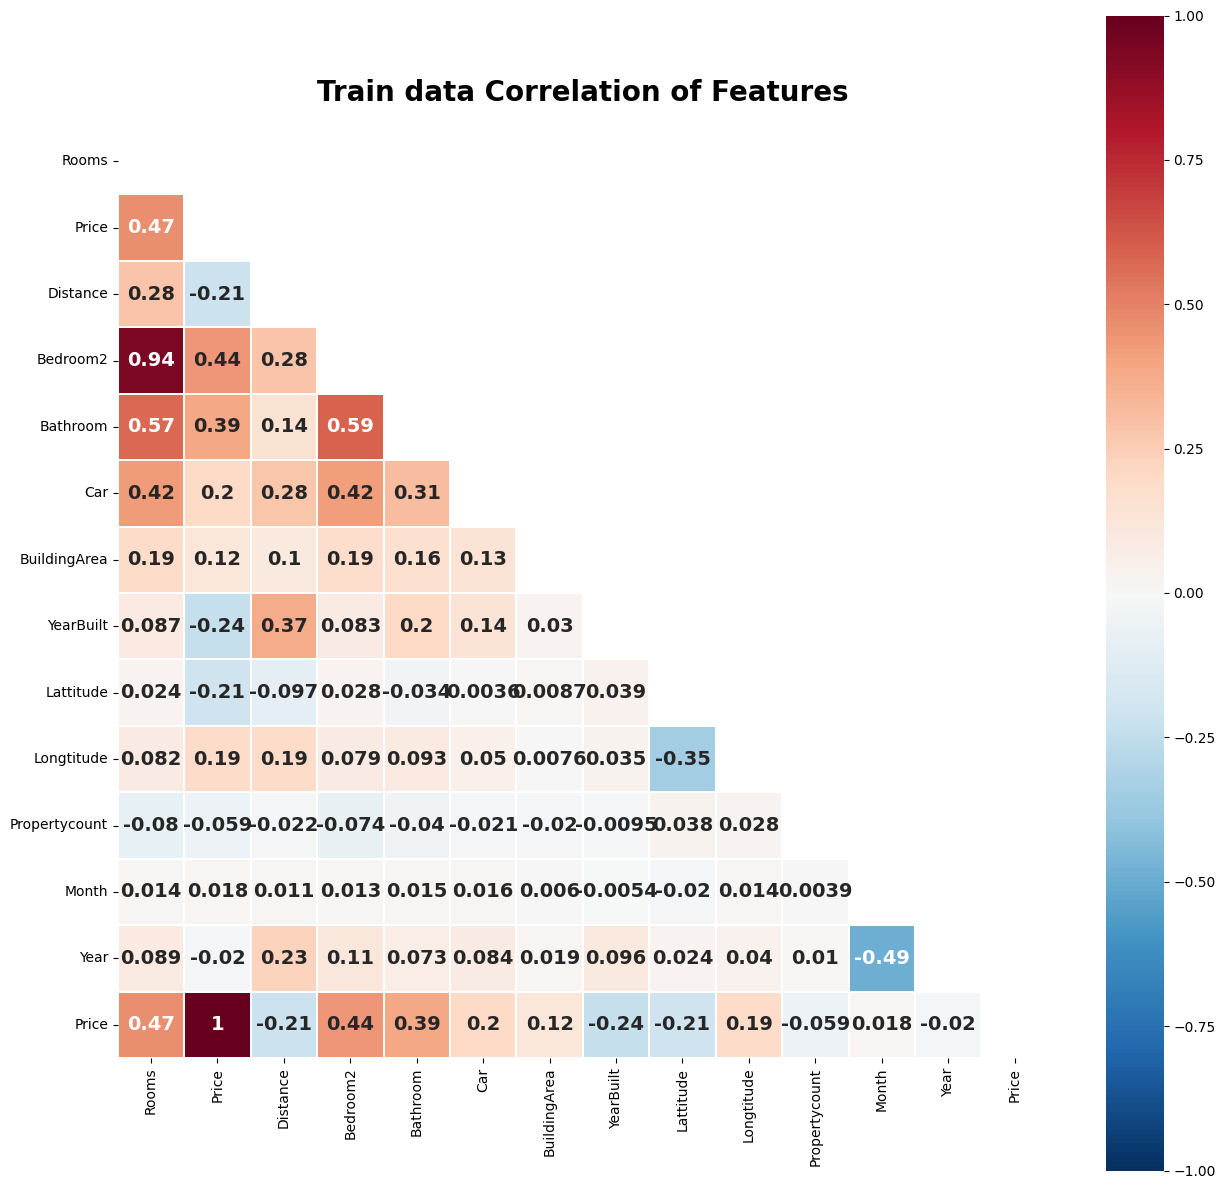

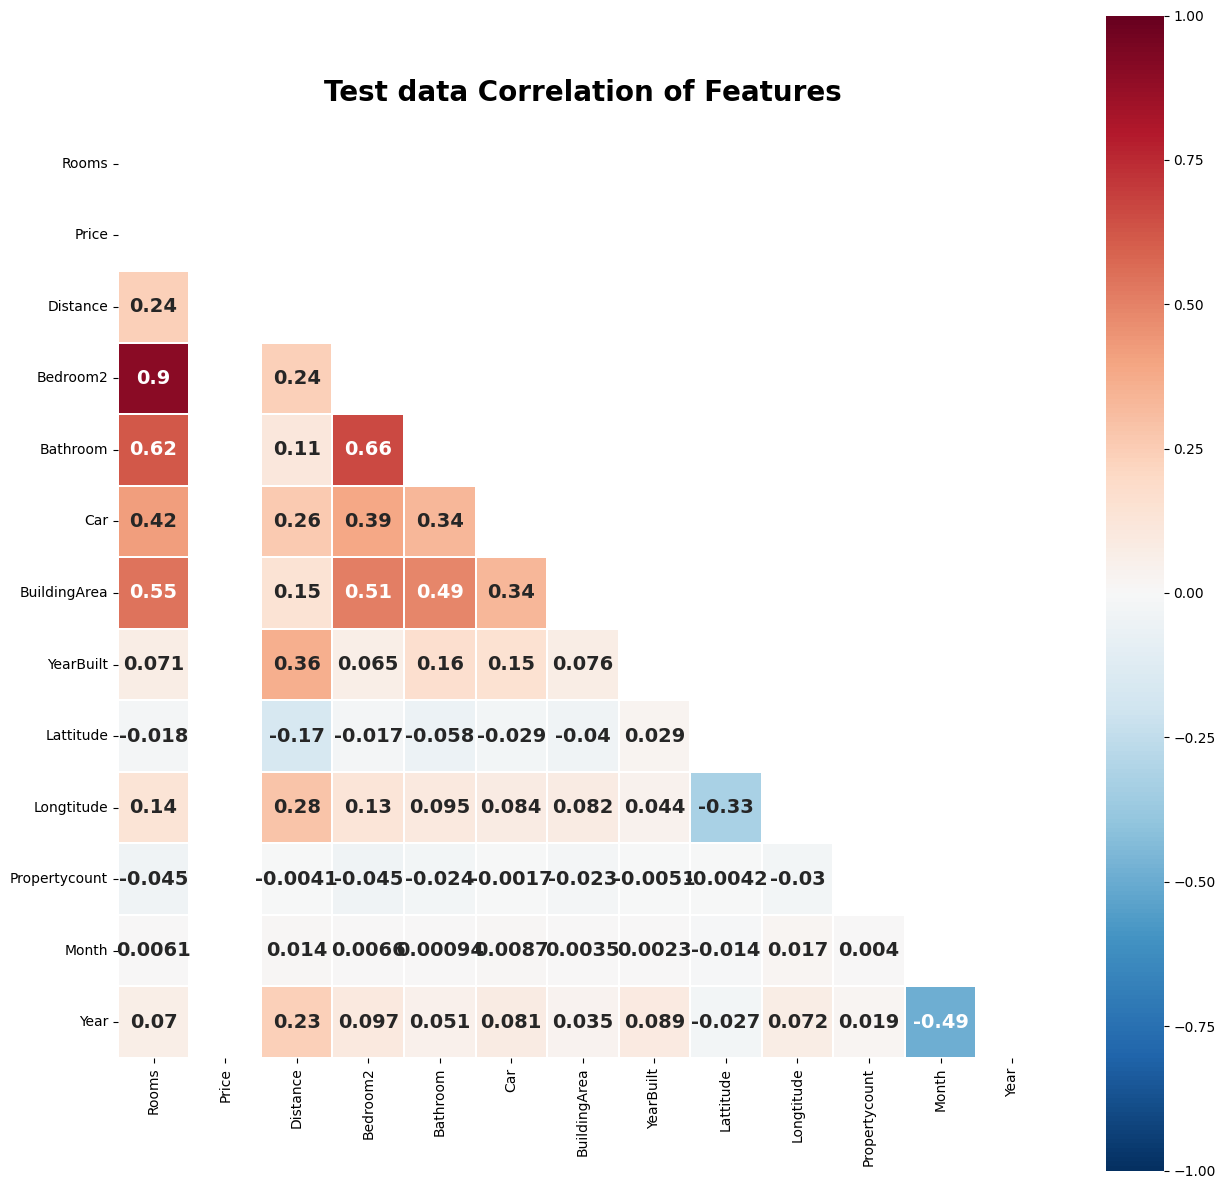

In [21]:
def plot_heatmap(df, title):
    # Create a mask for the diagonal elements
    mask = np.zeros_like(df.astype(float).corr())
    mask[np.triu_indices_from(mask)] = True

    # Set the colormap and figure size
    colormap = plt.cm.RdBu_r
    plt.figure(figsize=(15, 15))

    # Set the title and font properties
    plt.title(f'{title} Correlation of Features', fontweight='bold', y=1.02, size=20)

    # Plot the heatmap with the masked diagonal elements
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1.0, 
                square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 14, "weight": "bold"},
                mask=mask)

plot_heatmap(df_train[num_features+[target_col]], title='Train data')
plot_heatmap(df_test[num_features], title='Test data')

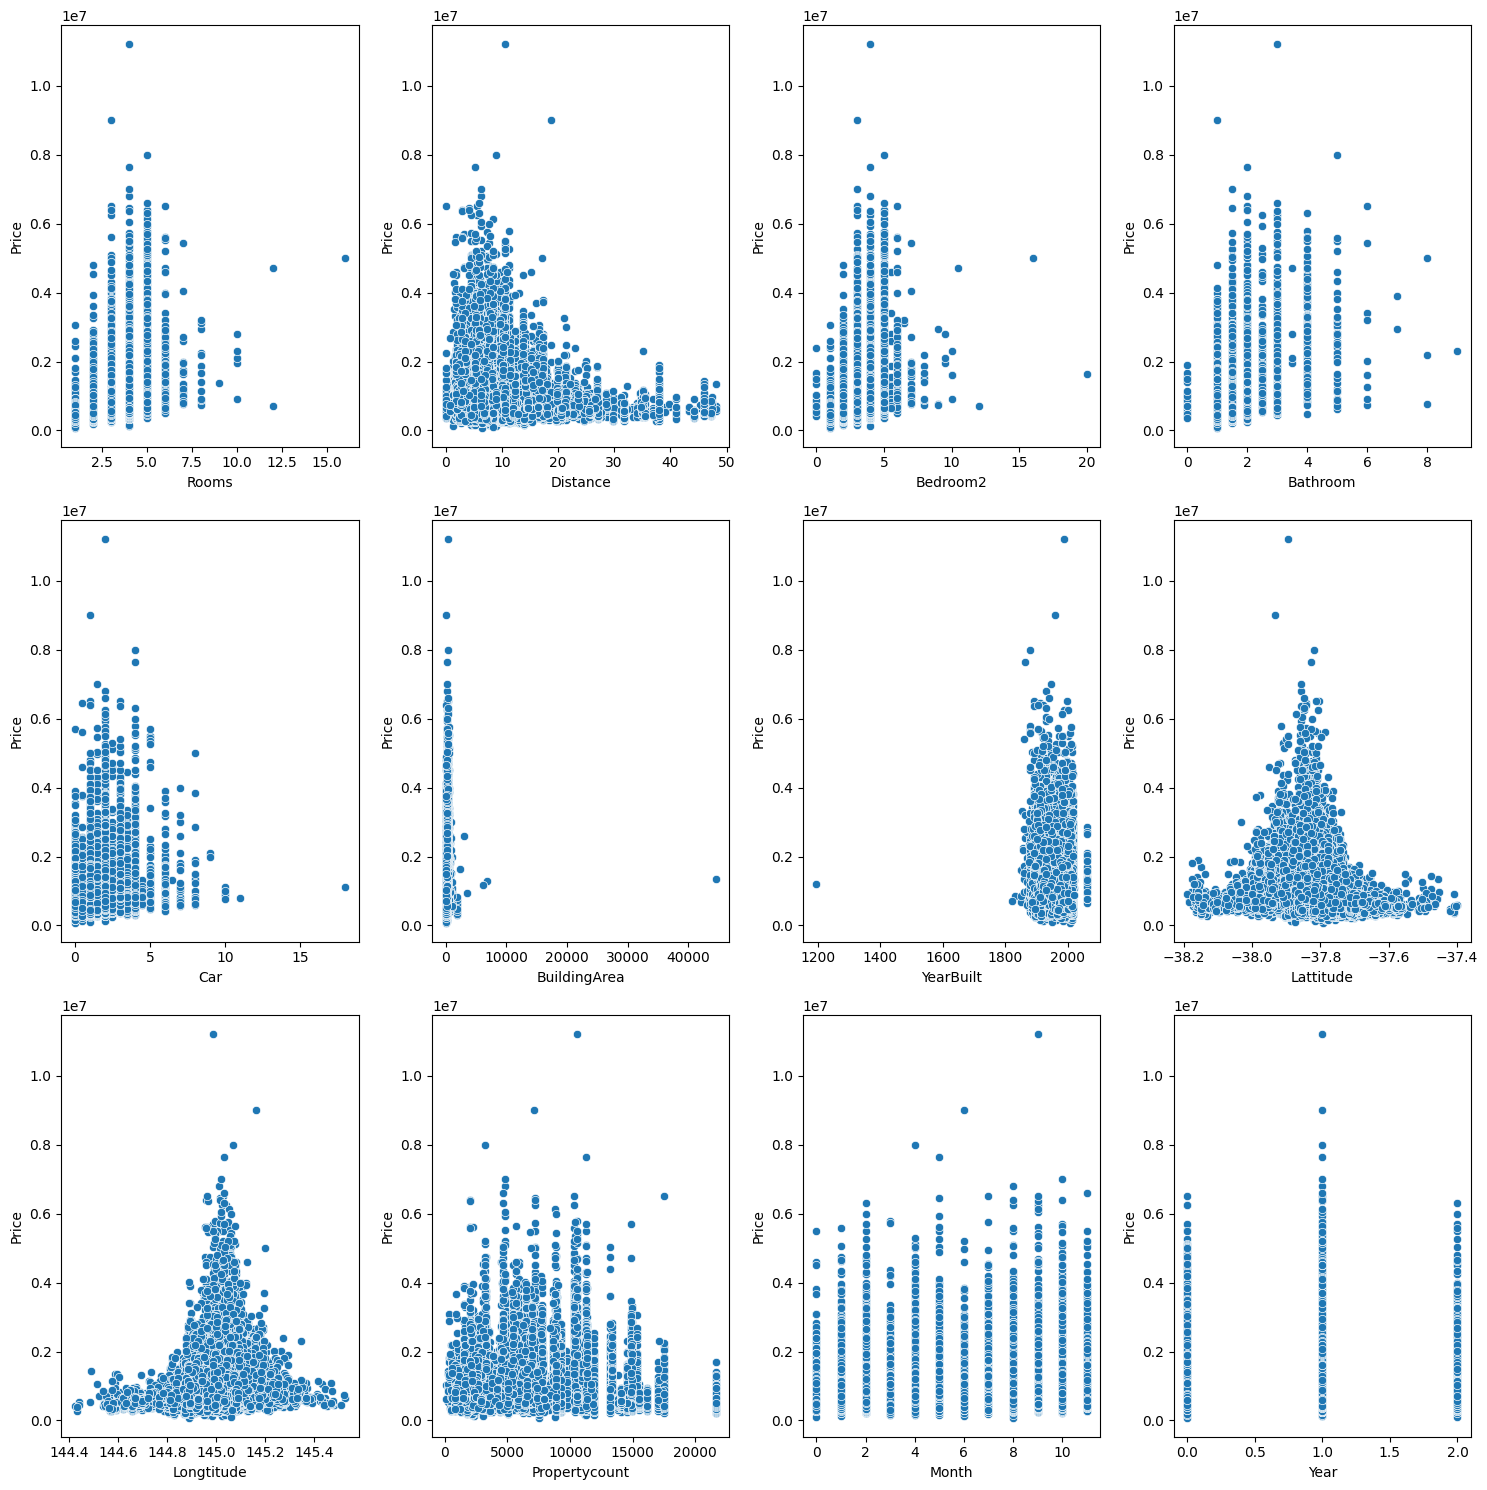

In [22]:
other_cols = [col for col in num_features if col != target_col]

# Subplot boyutları
n_cols = 4
n_rows = int(np.ceil(len(other_cols) / n_cols))

# Figür ve eksenler oluştur
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# Düzgün bir 1D array'e dönüştür (tek satır varsa 2D array olmaması için)
axes = axes.flatten()

# Scatter plotlarını çiz
for i, col in enumerate(other_cols):
    sns.scatterplot(data=df, x=col, y=target_col, ax=axes[i])

# Fazla eksenleri gizle
for i in range(len(other_cols), n_cols * n_rows):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Modelling

## Utils

In [23]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score , confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score , roc_auc_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE , ADASYN
from sklearn.model_selection import cross_val_score

class fonks:
    """
    Class'ın amacı:
    - Sıkça kullanılacak fonksiyonları oluşturmak ve kolayca çağırmak.
    - Daha düzenli ve değiştirilebilir bir programlama yapmak.
    """
    
    label = target_col
    
    def overSample(X , y , tactic = 'smote'):
        if tactic == 'smote':
            smote = SMOTE()
            X_resampled , y_resampled = smote.fit_resample(X , y)
            return X_resampled , y_resampled
        elif tactic == 'adasyn':
            adasyn = ADASYN()
            X_resampled , y_resampled = adasyn.fit_resample(X , y)
            return X_resampled , y_resampled
            
    
    def trainTest(X , y , test_size = 0.2 , stratify = None):
        """
        Alınan datayı istenen oranda Train & Test şeklinde bölüp X_train , X_test , y_train , y_test adındaki 4 değişken döndürür.

        Parameters
        ----------
        data : pandas.DataFrame
            Train & Test olarak bölünecek veri seti.
        label : str, optional
            Hedef değişkenin adı, by default 'Knowledge'.
        test_size : float, optional
            Test veri setinin boyutu, by default 0.2.

        Returns
        -------
        tuple
            X_train, X_test, y_train, y_test
        """

        if stratify == 'y' :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53 , stratify=y)
        else :
            X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=test_size , random_state=53)
        
        return X_train, X_test, y_train,y_test


    def simple_scores(y_train, y_train_pred, y_test, y_pred, name='Model' , task = 'reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Alınan acc, f1 ve precision skorlarını yazdırır.
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'
            
        Returns
        -------
        print
            Train Acc , Train F1 , Train Precision , Test Acc , Test F1 , Test Precision
        """
        
        
        if task == 'class':
            print(f'{name} Train Scores\n')
            print(f'{name} Train Accuracy : {accuracy_score(y_train , y_train_pred)}')
            print(f'{name} Train Recall : {recall_score(y_train, y_train_pred, pos_label=1)}')
            print(f'{name} Train Precision : {precision_score(y_train , y_train_pred, pos_label=1)}')
            print(f'{name} Train F1 : {f1_score(y_train , y_train_pred , pos_label=1)}')
            
            
            print("\n****************\n")
            
            print(f'{name} Test Scores\n')
            print(f'{name} Test Accuracy : {accuracy_score(y_test , y_pred)}')
            print(f'{name} Test Recall : {recall_score(y_test, y_pred, pos_label=1)}')
            print(f'{name} Test Precision : {precision_score(y_test , y_pred, pos_label=1)}')
            print(f'{name} Test F1 : {f1_score(y_test , y_pred, pos_label=1)}')
        elif task == 'reg':
            print(f'{name} Train Scores\n')
            print(f'{name} Train R2 : {r2_score(y_train , y_train_pred)}')
            print(f'{name} Train Mae : {mean_absolute_error(y_train, y_train_pred)}')
            print(f'{name} Train RMSE : {mean_squared_error(y_train , y_train_pred)**0.5}')
            print(f'{name} Train MSE : {mean_squared_error(y_train , y_train_pred)}')
            
            
            print("*************************")
            
            print(f'{name} Test Scores\n')
            print(f'{name} Test R2 : {r2_score(y_test , y_pred)}')
            print(f'{name} Test Mae : {mean_absolute_error(y_test, y_pred)}')
            print(f'{name} Test RMSE : {mean_squared_error(y_test , y_pred)**0.5}')
            print(f'{name} Test MSE : {mean_squared_error(y_test , y_pred)}')
            
            print("\n*****DONE*******")
        
    def get_r2_score(y_true, y_pred):
        return r2_score(y_true,y_pred)
    def get_mae_score(y_true, y_pred):
        return mean_absolute_error(y_true,y_pred)
    def get_rmse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)**0.5
    def get_mse_score(y_true, y_pred):
        return mean_squared_error(y_true,y_pred)
        
        
    def get_acc_score(y_true, y_pred):
        return accuracy_score(y_true , y_pred)    
    def get_f1_score(y_true, y_pred):
        return f1_score(y_true , y_pred , pos_label=1)
    
    def get_recall(y_true, y_pred):
        return recall_score(y_true, y_pred, pos_label=1)
    
    def get_roc_auc(y_true, y_pred):
        return roc_auc_score(y_true, y_pred, pos_label=1)
    
    
    def eval_metric(y_train, y_train_pred, y_test, y_pred, name='Model'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Confusion_matrix ve Classification_report'u yazdırır..
        Sadece Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Görevin type'ı 'reg' or 'class'            
            
        Returns
        -------
        print
            Train Confusion_matrix , Train Classification_report , Test Confusion_matrix , Test Classification_report
        """
        
        print(f"Test_Set {name}")
        print(confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print()
        print(f"Train_Set {name}")
        print(confusion_matrix(y_train, y_train_pred))
        print(classification_report(y_train, y_train_pred))         
        
    

    def train_test_df(y_train, y_train_pred, y_test, y_pred, name='Model' , task='reg'):
        """
        Model ismini, Train ve Test'e ait tahmin ve gerçek değerleri alıp, Accuracy, Recall, Precision,  yazdırır..
        Hem Regression hem Classification taskleri için tasarlanmıştır.
        
        Parameters
        ----------
        y_train : pandas.DataFrame
            Train verisinin gerçek değerleri.
        y_train_pred : pandas.DataFrame
            Train verisine ait tahmin değerleri.
        y_test : pandas.DataFrame
            Test verisinin gerçek değerleri.
        y_test_pred : pandas.DataFrame
            Test verisine ait tahmin değerleri.
        name : str optional
            Tahmini alınan modelin ismi, by default 'Model'.
        task : str optional, default 'reg'
            Datamızın task'i, 'reg' or 'class'
            
        Returns
        -------
        print
            Train Accuracy , Train Recall , Train Precision , Train F1 , Test Accuracy , Test Recall , Test Precision , Test F1
        """
        
        
        if task == 'class':
            scores = {name+"_train": {"Accuracy" : accuracy_score(y_train, y_train_pred),
            "Recall" : recall_score(y_train, y_train_pred , pos_label=1),
            "Precision" : precision_score(y_train, y_train_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_train, y_train_pred , pos_label=1))},
                    
            name+"_test": {"Accuracy" : accuracy_score(y_test, y_pred),
            "Recall" : recall_score(y_test, y_pred , pos_label=1),
            "Precision" : precision_score(y_test, y_pred , pos_label=1),
            "F1" : np.sqrt(f1_score(y_test, y_pred , pos_label=1))}}
            return pd.DataFrame(scores)
        
        
        
        if task == 'reg':
            
            scores = {name+"_train": {"R2" : r2_score(y_train, y_train_pred),
            "mae" : mean_absolute_error(y_train, y_train_pred),
            "mse" : mean_squared_error(y_train, y_train_pred),
            "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
                    
            name+"_test": {"R2" : r2_score(y_test, y_pred),
            "mae" : mean_absolute_error(y_test, y_pred),
            "mse" : mean_squared_error(y_test, y_pred),
            "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
            return pd.DataFrame(scores)
        
    def get_cross_val_score(model, X, y, cv=5):
        """
        Cross Validation Score'unu hesaplar.
        
        Parameters
        ----------
        model : sklearn.model
            Modeliniz.
        X : pandas.DataFrame
            X değişkeni.
        y : pandas.DataFrame
            y değişkeni.
        cv : int, optional
            Kaç katlamalı cross validation için yapılacak, by default 5.
        
        Returns
        -------
        float
            Cross Validation Score.
        """
        
        return cross_val_score(model, X, y, cv=cv).mean()

## Hyper Parameter Optimization for Ensemble Models

### XGB Optuna

In [24]:
import optuna
from xgboost import XGBRegressor

def objective_xgb(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'gamma': trial.suggest_float('gamma', 0, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 3.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 3.0, log=True)
    }
    model = XGBRegressor(tree_method= 'gpu_hist', predictor= 'gpu_predictor' , gpu_id = 0, **params)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)
    return mean_squared_error(y_test, model.predict(X_test))

study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=100)
best_params_xgb = study_xgb.best_params

[I 2023-10-18 14:12:55,359] A new study created in memory with name: no-name-d952099b-e5d9-43e5-92ae-2cfceb7d3712
[I 2023-10-18 14:13:00,135] Trial 0 finished with value: 81435504542.65846 and parameters: {'learning_rate': 0.044951421412377165, 'n_estimators': 262, 'max_depth': 11, 'subsample': 0.7547694965551267, 'colsample_bytree': 0.7177340353295096, 'gamma': 0.4688000406422946, 'reg_lambda': 1.932347193503068e-08, 'reg_alpha': 2.846684100246959}. Best is trial 0 with value: 81435504542.65846.
[I 2023-10-18 14:13:05,353] Trial 1 finished with value: 91049977028.53812 and parameters: {'learning_rate': 0.164863014252083, 'n_estimators': 245, 'max_depth': 14, 'subsample': 0.5501471697986696, 'colsample_bytree': 0.8181802728208232, 'gamma': 0.3531453299909283, 'reg_lambda': 2.990111638610411, 'reg_alpha': 5.171602420036929e-06}. Best is trial 0 with value: 81435504542.65846.
[I 2023-10-18 14:13:05,978] Trial 2 finished with value: 88299771705.1363 and parameters: {'learning_rate': 0.266

### LGBM Optuna

In [26]:
from lightgbm import LGBMRegressor

def objective_lgbm(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'subsample': trial.suggest_float('subsample', 0.5, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 3.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 3.0, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100)
    }
    model = LGBMRegressor(device= 'gpu', **params)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)
    return mean_squared_error(y_test, model.predict(X_test))

study_lgbm = optuna.create_study(direction='minimize')
study_lgbm.optimize(objective_lgbm, n_trials=100)
best_params_lgbm = study_lgbm.best_params

[I 2023-10-18 14:25:38,305] A new study created in memory with name: no-name-1c0ebbe4-2d8b-4589-ac7b-d30662feaeed
[I 2023-10-18 14:25:40,366] Trial 0 finished with value: 90515770427.38666 and parameters: {'learning_rate': 0.03211068817370405, 'n_estimators': 102, 'max_depth': 9, 'subsample': 0.5655692254142146, 'colsample_bytree': 0.509870261790085, 'reg_lambda': 0.005629396525074325, 'reg_alpha': 5.967785678236063e-06, 'num_leaves': 251, 'min_child_samples': 77}. Best is trial 0 with value: 90515770427.38666.
[I 2023-10-18 14:25:42,935] Trial 1 finished with value: 82374261962.74841 and parameters: {'learning_rate': 0.11576686888057984, 'n_estimators': 937, 'max_depth': 12, 'subsample': 0.5715989448302756, 'colsample_bytree': 0.7963793694667229, 'reg_lambda': 4.769532711839673e-06, 'reg_alpha': 1.1890823964957184e-08, 'num_leaves': 69, 'min_child_samples': 95}. Best is trial 1 with value: 82374261962.74841.
[I 2023-10-18 14:25:44,042] Trial 2 finished with value: 86357049920.87376 an

### CatBoost Optuna

In [32]:
from catboost import CatBoostRegressor

def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-8, 3.0, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        # 'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1),
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']),
        'loss_function': 'RMSE',
        'eval_metric': 'RMSE',
        'task_type': 'GPU',  # GPU kullanımını etkinleştir
        'verbose': False
    }

    if params['bootstrap_type'] != 'Bayesian':
        params['subsample'] = trial.suggest_float('subsample', 0.1, 1)

    if params['bootstrap_type'] == 'Bayesian':
        params['bagging_temperature'] = trial.suggest_float('bagging_temperature', 0, 10)
    
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)
    return mean_squared_error(y_test, model.predict(X_test))

study_catboost = optuna.create_study(direction='minimize')
study_catboost.optimize(objective_catboost, n_trials=100)
best_params_catboost = study_catboost.best_params


[I 2023-10-18 15:00:34,996] A new study created in memory with name: no-name-1434e8d8-c6b2-4865-b307-0198d1ebccf7
[I 2023-10-18 15:00:37,152] Trial 0 finished with value: 82844699966.81046 and parameters: {'iterations': 267, 'learning_rate': 0.10478385016603986, 'depth': 8, 'l2_leaf_reg': 2.921295493919246e-06, 'border_count': 139, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.0665018259296333}. Best is trial 0 with value: 82844699966.81046.
[I 2023-10-18 15:00:44,164] Trial 1 finished with value: 87131195471.61864 and parameters: {'iterations': 775, 'learning_rate': 0.0508283092593965, 'depth': 5, 'l2_leaf_reg': 1.1733118289362143, 'border_count': 49, 'bootstrap_type': 'Bernoulli', 'subsample': 0.5612238506935495}. Best is trial 0 with value: 82844699966.81046.
[I 2023-10-18 15:00:51,660] Trial 2 finished with value: 85450282058.43054 and parameters: {'iterations': 811, 'learning_rate': 0.23116572529748533, 'depth': 10, 'l2_leaf_reg': 2.5065280506541927, 'border_count': 216, 

# Build optimized models

In [33]:
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Modellerin tanımlandığı sözlük
models = {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    # 'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)},
    
    'XGBoost': {'model': XGBRegressor(tree_method= 'gpu_hist', predictor= 'gpu_predictor' , gpu_id = 0, **best_params_xgb)},
    'LGBM': {'model': LGBMRegressor(device= 'gpu' , **best_params_lgbm)},
    'CatBoost': {'model': CatBoostRegressor(task_type= 'GPU' , verbose=0) }
}

# Her model için eğitim ve metrik hesaplama için saklanan metrikler
results = {
    'Model': [],
    'R2_train': [],
    'R2_test': [],
    'MAE_train': [],
    'MAE_test': [],
    'MSE_train': [],
    'MSE_test': [],
    'RMSE_train': [],
    'RMSE_test': []
}

In [34]:
for name, model_info in models.items():
    model = model_info['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    # Metrikleri hesapla
    r2_train = fonks.get_r2_score(y_train, y_train_pred)
    r2_test = fonks.get_r2_score(y_test, y_pred)
    mae_train = fonks.get_mae_score(y_train, y_train_pred)
    mae_test = fonks.get_mae_score(y_test, y_pred)
    mse_train = fonks.get_mse_score(y_train, y_train_pred)
    mse_test = fonks.get_mse_score(y_test, y_pred)
    rmse_train = fonks.get_rmse_score(y_train, y_train_pred)
    rmse_test = fonks.get_rmse_score(y_test, y_pred)
    
    # Metrikleri sözlüğe ekle
    results['Model'].append(name)
    results['R2_train'].append(r2_train)
    results['R2_test'].append(r2_test)
    results['MAE_train'].append(mae_train)
    results['MAE_test'].append(mae_test)
    results['MSE_train'].append(mse_train)
    results['MSE_test'].append(mse_test)
    results['RMSE_train'].append(rmse_train)
    results['RMSE_test'].append(rmse_test)

    # Metrikleri ekrana yazdır
    fonks.simple_scores(y_train, y_train_pred, y_test, y_pred, name=name, task='reg')
    print()

# Sözlüğü DataFrame'e dönüştür
df_results = pd.DataFrame(results)

# Dinamik olarak değişkenleri oluştur
for index, row in df_results.iterrows():
    model_name = row['Model'].replace(" ", "") # Boşlukları kaldır
    globals()[f"{model_name}_R2_train"] = row['R2_train']
    globals()[f"{model_name}_R2_test"] = row['R2_test']
    globals()[f"{model_name}_MAE_train"] = row['MAE_train']
    globals()[f"{model_name}_MAE_test"] = row['MAE_test']
    globals()[f"{model_name}_MSE_train"] = row['MSE_train']
    globals()[f"{model_name}_MSE_test"] = row['MSE_test']
    globals()[f"{model_name}_RMSE_train"] = row['RMSE_train']
    globals()[f"{model_name}_RMSE_test"] = row['RMSE_test']

# Örnek olarak Lasso için değişkenlere erişim
# print(Lasso_R2_train)
# print(Lasso_R2_test)
# print(Lasso_MAE_train)
# print(Lasso_MAE_test)
# ... diğer değişkenleri de aynı şekilde kullanabilirsiniz

Lasso Train Scores

Lasso Train R2 : 0.5360095861137115
Lasso Train Mae : 277722.0794588733
Lasso Train RMSE : 436775.5313234016
Lasso Train MSE : 190772864762.83978
*************************
Lasso Test Scores

Lasso Test R2 : 0.5440142829762036
Lasso Test Mae : 279321.13440569723
Lasso Test RMSE : 433870.78552989295
Lasso Test MSE : 188243858536.32635

*****DONE*******

LinearRegression Train Scores

LinearRegression Train R2 : 0.5360095866481305
LinearRegression Train Mae : 277722.5341082336
LinearRegression Train RMSE : 436775.53107186506
LinearRegression Train MSE : 190772864543.10974
*************************
LinearRegression Test Scores

LinearRegression Test R2 : 0.5440143366039875
LinearRegression Test Mae : 279321.5692987644
LinearRegression Test RMSE : 433870.7600164519
LinearRegression Test MSE : 188243836397.25357

*****DONE*******

Ridge Train Scores

Ridge Train R2 : 0.5360084929634299
Ridge Train Mae : 277713.7606938659
Ridge Train RMSE : 436776.0458394342
Ridge Train MS

# Compare Models

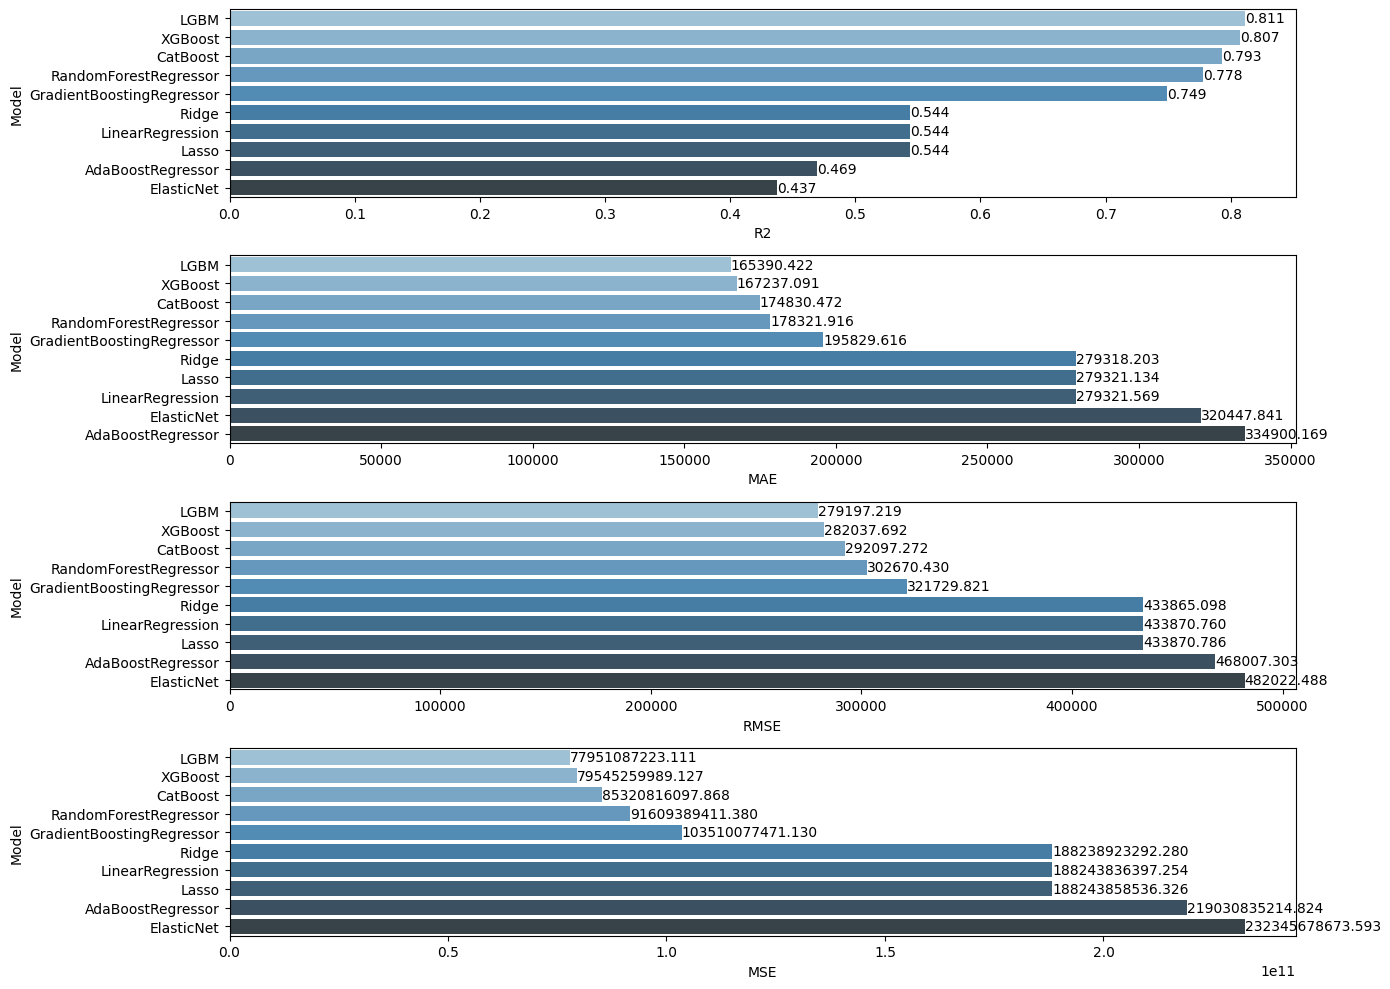

In [35]:
compare = pd.DataFrame({"Model": ["Lasso" , "LinearRegression", "Ridge",
                                 "ElasticNet", "RandomForestRegressor" , "GradientBoostingRegressor",'AdaBoostRegressor',
                                 'XGBoost',  'LGBM' , 'CatBoost'],
                        "R2": [Lasso_R2_test, LinearRegression_R2_test , Ridge_R2_test , ElasticNet_R2_test , RandomForestRegressor_R2_test , GradientBoostingRegressor_R2_test , AdaBoostRegressor_R2_test , XGBoost_R2_test , LGBM_R2_test , CatBoost_R2_test],
                        "MAE": [Lasso_MAE_test, LinearRegression_MAE_test , Ridge_MAE_test , ElasticNet_MAE_test , RandomForestRegressor_MAE_test , GradientBoostingRegressor_MAE_test , AdaBoostRegressor_MAE_test , XGBoost_MAE_test , LGBM_MAE_test , CatBoost_MAE_test],
                        "RMSE": [Lasso_RMSE_test, LinearRegression_RMSE_test , Ridge_RMSE_test , ElasticNet_RMSE_test , RandomForestRegressor_RMSE_test , GradientBoostingRegressor_RMSE_test , AdaBoostRegressor_RMSE_test , XGBoost_RMSE_test , LGBM_RMSE_test , CatBoost_RMSE_test],
                        "MSE": [Lasso_MSE_test, LinearRegression_MSE_test , Ridge_MSE_test , ElasticNet_MSE_test , RandomForestRegressor_MSE_test , GradientBoostingRegressor_MSE_test , AdaBoostRegressor_MSE_test , XGBoost_MSE_test , LGBM_MSE_test , CatBoost_MSE_test],
                        })

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(14,10))
plt.subplot(411)
compare = compare.sort_values(by="R2", ascending=False)
ax=sns.barplot(x="R2", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="MAE", ascending=True)
ax=sns.barplot(x="MAE", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(413)
compare = compare.sort_values(by="RMSE", ascending=True)
ax=sns.barplot(x="RMSE", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="MSE", ascending=True)
ax=sns.barplot(x="MSE", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.tight_layout()  # Optional: Adjust subplot spacing
plt.show()

# Final Model

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import joblib

# Modeli tanımlayın
final_model = LGBMRegressor(device='gpu', **best_params_lgbm)

# Çapraz doğrulama ile modelin performansını değerlendirin
scores = cross_val_score(final_model, X, y, cv=5, scoring=make_scorer(r2_score))
print(f"R2 Score: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

scores_mae = -cross_val_score(final_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"MAE: {np.mean(scores_mae):.4f} (+/- {np.std(scores_mae):.4f})")

scores_mse = -cross_val_score(final_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"MSE: {np.mean(scores_mse):.4f} (+/- {np.std(scores_mse):.4f})")

scores_rmse = np.sqrt(-cross_val_score(final_model, X, y, cv=5, scoring='neg_mean_squared_error'))
print(f"RMSE: {np.mean(scores_rmse):.4f} (+/- {np.std(scores_rmse):.4f})")

R2 Score: 0.7719 (+/- 0.0123)
MAE: 176510.3004 (+/- 18347.6318)
MSE: 93046993220.8032 (+/- 12248045402.6708)
RMSE: 304362.4294 (+/- 19565.9496)


In [37]:
# Modeli tüm data ile eğitin
final_model.fit(X, y)

# Modeli Kaydedin
joblib.dump(final_model, 'final_model_lgbm.pkl')

print("Model başarıyla kaydedildi!")

Model başarıyla kaydedildi!


In [ ]:
# Done for now.